### Background

Coronary heart disease (CHD) is the most common form of cardiovascular disease and involves reduced blood flow to the heart muscle due to plaque buildup in the arteries. While invasive coronary angiography is the current gold standard for diagnosing CHD, this method carries risks and high costs. Therefore, developing a non-invasive, computer-aided diagnostic tool by combining existing less invasive tests like exercise electrocardiogram, thallium scintigraphy, and coronary calcification imaging could boost their diagnostic accuracy. With further refinement, such a tool could potentially replace angiography as the gold standard for CAD diagnosis, improving patient outcomes and reducing healthcare costs. The diagnostic power of non-invasive testing alone ranges from 35%-75%, but a computer-aided approach that analyzes results from multiple modalities together shows promise for surpassing angiography's diagnostic capabilities without the associated risks and expenses.

The dataset contains 303 observations with 13 features and 1 target variable. The 13 features consist of results from the non-invasive diagnostic tests mentioned previously, as well as other relevant patient data. The target variable represents the outcome of the invasive coronary angiogram, with a value of 0 indicating no coronary artery disease present and values of 1-4 indicating presence of disease at varying levels of severity. Most research utilizing this dataset has focused solely on distinguishing between presence (values 1-4) and absence (value 0) of coronary heart disease.



### Attributes:

The data set was downloaded from the [UCI website](https://archive.ics.uci.edu/dataset/45/heart+disease) .

Attribute Information:

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
13. **thal**: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. **class**: target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel. It will be transformed to:
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

---

In [1]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv("heart.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0,2,0,2,1


In [4]:
#change column name

df = df.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'], axis=1)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0,2,0,2,1


**Checking *'missing values'***:

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [7]:
blank_count = df[df['ca'].isnull()].shape[0]

print(blank_count)

0


The dataset allegedly has no missing values. But if we check the source, it mentions that there are missing values in **ca** and **thal** attributes which is symbolized with '?'.

In [8]:
print(df['ca'].unique())
print(df['thal'].unique())

['ca' '2' '0' '1' '3' '4']
['thal' '3' '2' '1' '0']


In [9]:
print((df == "?").sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64


In [10]:
print((df['ca'] == "?").sum())
print((df['thal'] == "?").sum())

0
0


There are various ways to handle missing data (missing values).

For example:

- If the attribute is **categorical**, replace the missing data with the most frequently occurring value (the mode).
- If the feature is **numerical (continuous)**, replace the missing data with the mean value.
- Or simply remove rows that have missing data if the number is insignificant (The simplest approach).

### Deleting 'missing values'

In [11]:
df_drop = df[(df["ca"] != '?') & (df["thal"] != '?')]

In [12]:
df_drop

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0,2,0,2,1


### Missing Values Imputation with The Most Frequent Value using SKLearn

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values="?", strategy='most_frequent')

imputer.fit(df)

df_imputed = imputer.transform(df)

In [14]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0,2,0,2,1


---

## EDA

### Summary Statistics

In [15]:
stat_columns = ['age','trestbps','chol','thalach','oldpeak']

In [16]:
df[stat_columns].describe()

,age,trestbps,chol,thalach,oldpeak
count,1026,1026,1026,1026,1026
unique,42,50,153,92,41
top,58,120,204,162,0
freq,68,128,21,35,329


In [17]:
#change variables types
for col in df_imputed.columns:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').astype(float)

# Check dtypes    
df_imputed.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class       float64
dtype: object

In [18]:
#Change values (1,2,3) into '1' so that class labels values:
#- Value 0: < 50% diameter narrowing --> no disease
#- Value 1: > 50% diameter narrowing --> has disease

df_imputed.loc[df_imputed['class'].isin([1, 2, 3, 4]), 'class'] = 1

df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
2,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
3,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
4,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1022,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1023,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1024,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


### Correlation Matrix

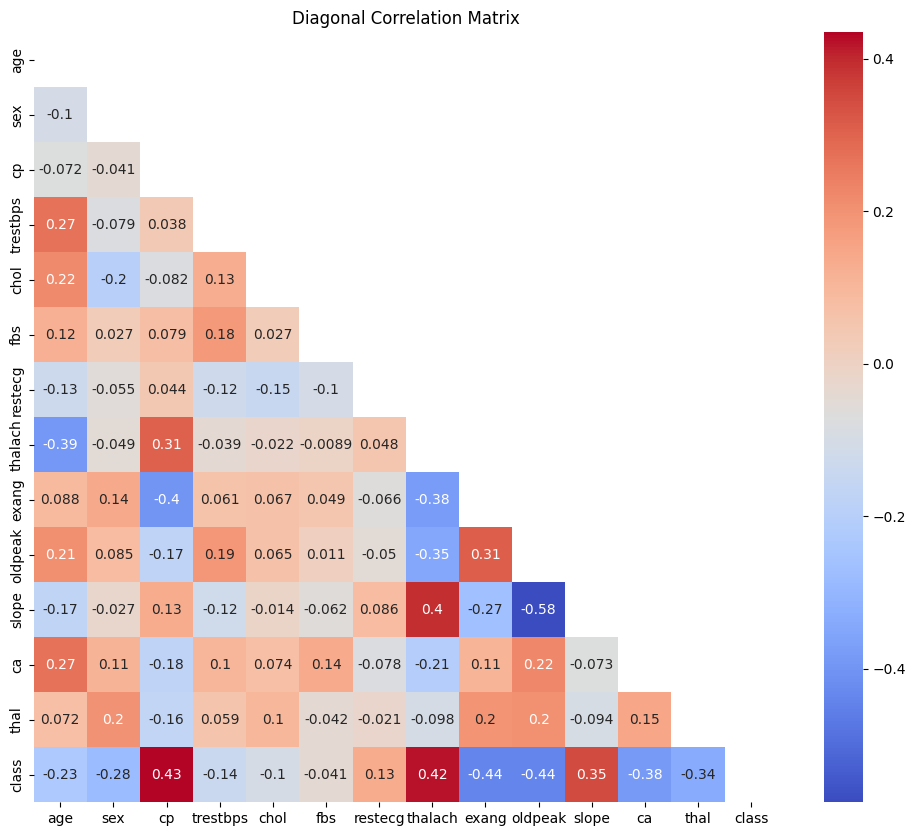

In [19]:
# Calculate the correlation matrix
corr = df_imputed.corr()

# Create a mask for the upper triangle to hide redundant information
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the Matplotlib figure and axis
plt.figure(figsize=(12, 10))  # Set the figure size
ax = sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')

# Customize the plot
plt.title('Diagonal Correlation Matrix')
plt.show()

In [20]:
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
class         int64
dtype: object

In [25]:
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRateAchieved',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'Slope',
    'ca': 'NumberOfMajorVessels',
    'thal': 'Thalassemia',
    'target': 'Target'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

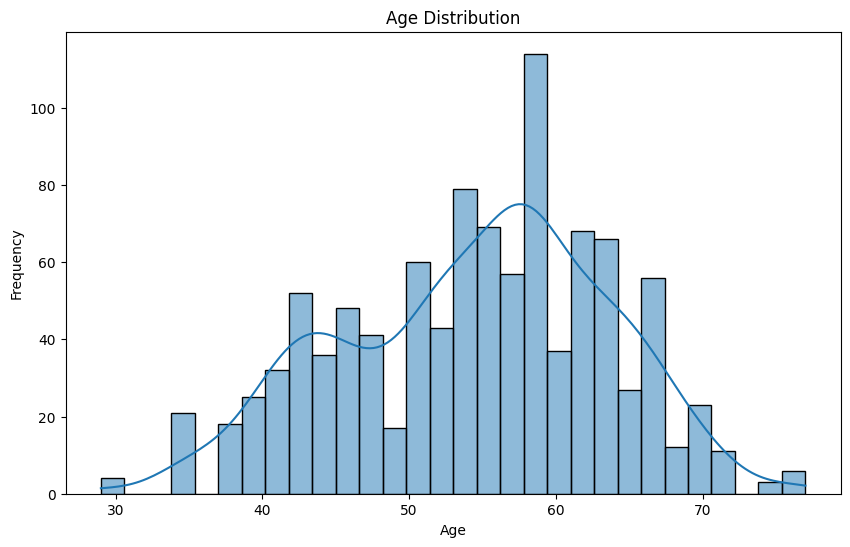

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

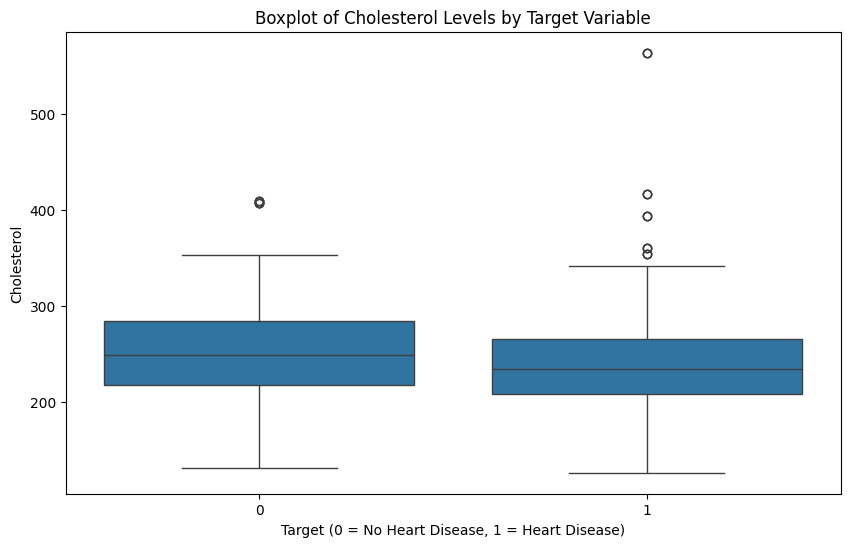

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Cholesterol', data=df)
plt.title('Boxplot of Cholesterol Levels by Target Variable')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Cholesterol')
plt.show()

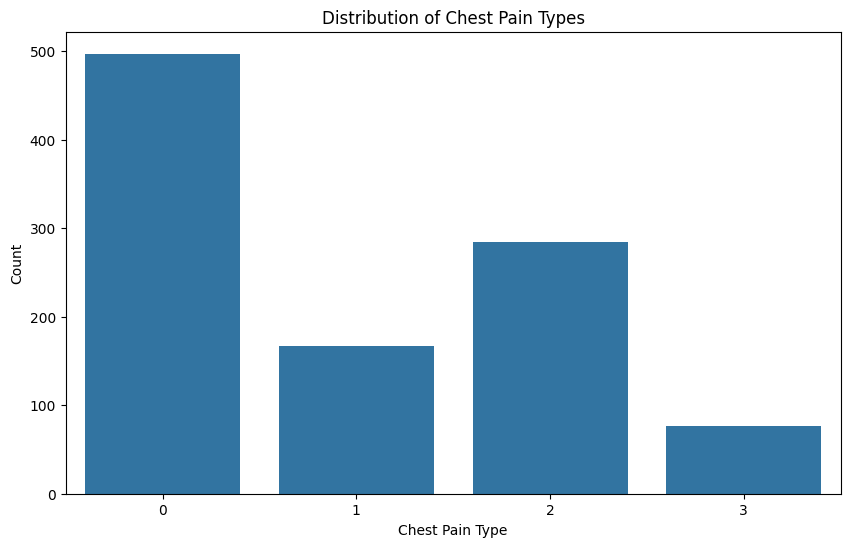

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', data=df)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

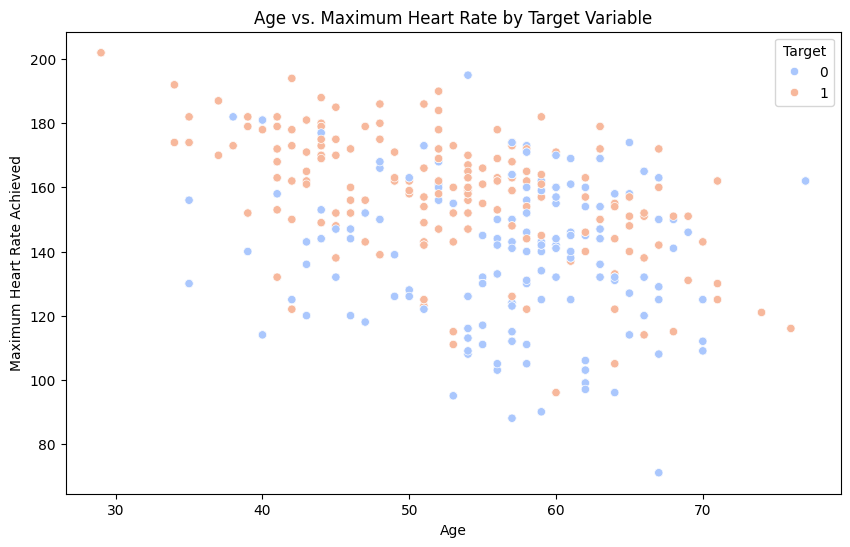

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MaxHeartRateAchieved', hue='class', data=df, palette='coolwarm')
plt.title('Age vs. Maximum Heart Rate by Target Variable')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Target')
plt.show()